In [1]:
import numpy             as np
import scipy             as sp
import pandas            as pd
import scipy.optimize    as op
import matplotlib.pyplot as plt

import io
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline

import re
from datetime import datetime

In [2]:
def mnkerr(x, y):
    p = np.polyfit(x, y, 1)
    cov = np.cov(x, y)
    da = 2*(1/(len(x) - 2) * (cov[1][1]/cov[0][0] - p[0]**2))**(0.5)
    db = da * (x**2).mean()
    return [da, db]

In [3]:
space = re.compile(r' ')
converters = {
    'B1'   : lambda x: float(space.split(x)[0].replace(',', '.')),
    'B2'   : lambda x: float(space.split(x)[0].replace(',', '.')),
    'time' : lambda x: datetime.strptime(x, '%Y-%m-%d, %H:%M:%S'),
}

types = {
    'B1' : np.double,
    'B2' : np.double,
}

In [4]:
II2 = pd.read_csv('data/II2.csv', sep = '\t', converters=converters);
II2['time'] = (II2['time'] - II2['time'][0]).dt.total_seconds()

II22 = pd.read_csv('data/II22.csv', sep = '\t', converters=converters);
II22['time'] = (II22['time'] - II22['time'][0]).dt.total_seconds()

III2 = pd.read_csv('data/III2.csv', sep = '\t', converters=converters);
III2['time'] = (III2['time'] - III2['time'][0]).dt.total_seconds()

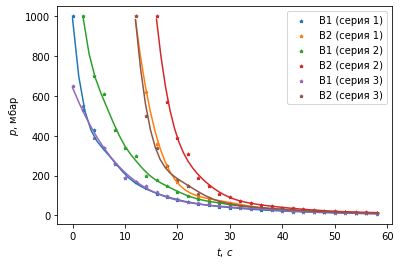

In [126]:
fr = 0
to = 30

def show(x, y, lbl, fr, to):
    spl = UnivariateSpline(x[fr:to], y[fr:to])
    spl.set_smoothing_factor(3e3)
    t = np.linspace(x[fr:to].min(), x[fr:to].max())
    plt.scatter(x[fr:to], y[fr:to], s=10, marker='*', label=lbl)
    plt.plot(t, spl(t))

fr = 0   
show(II2['time'], II2['B1'], 'B1 (cерия 1)', 0, to)
show(II2['time'], II2['B2'], 'В2 (cерия 1)', 6, to)
show(II22['time'], II22['B1'], 'В1 (cерия 2)', 1, to)
show(II22['time'], II22['B2'], 'В2 (cерия 2)', 8, to)
show(III2['time'], III2['B1'], 'В1 (cерия 3)', 0, to)
show(III2['time'], III2['B2'], 'В2 (cерия 3)', 6, to)

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$p$, мбар")
    
plt.legend()

plt.savefig('res/p(t).pdf')

$-0.05354 \pm 0.00272$     &    $5.265 \pm 4.75$
$-0.05813 \pm 0.003382$     &    $5.727 \pm 5.904$
$-0.05466 \pm 0.003204$     &    $5.354 \pm 5.594$


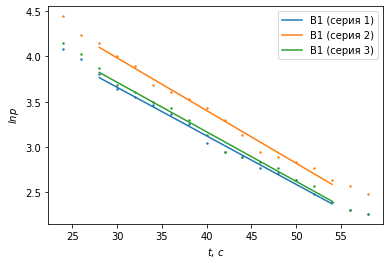

In [127]:
SIZE = 2
fr = 12
to = 30

def lin(x, y, lbl):
    t = np.linspace(x[2:-2].min(), x[2:-2].max())
    plt.scatter(x, y, s=SIZE)
    cf = np.polyfit(x[2:-2], y[2:-2], 1)
    er = mnkerr(x[2:-2], y[2:-2])
    #print(cf, er)
    print('${a:.4} \pm {ea:.4}$     &    ${b:.4} \pm {eb:.4}$'.format(a=cf[0], ea=er[0], b=cf[1], eb=er[1]))
    plt.plot(t, np.polyval(np.polyfit(x[2:-2], y[2:-2], 1), t), label=lbl)           

lin( II2['time'][fr:to], np.log(II2['B1'][fr:to]), 'B1 (cерия 1)')
lin(II22['time'][fr:to], np.log(II22['B1'][fr:to]), 'B1 (cерия 2)')
lin(III2['time'][fr:to], np.log(III2['B1'][fr:to]), 'B1 (cерия 3)')

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$lnp$")
    
plt.legend()

plt.savefig('res/lnB1(t).pdf')

In [140]:
(0.05813 - 0.05354 ) / 0.05813

0.07896094959573377

In [141]:
(0.06**2 + 0.08**2)**0.5

0.1

$-0.06114 \pm 0.003735$     &    $5.853 \pm 6.521$
$-0.07164 \pm 0.004122$     &    $6.609 \pm 7.196$
$-0.06261 \pm 0.002949$     &    $5.95 \pm 5.149$


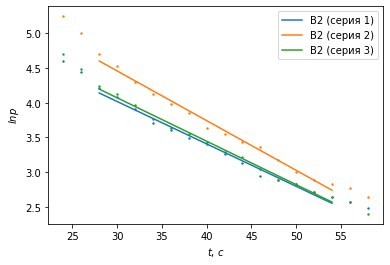

In [128]:
lin( II2['time'][fr:to], np.log(II2['B2'][fr:to]), 'B2 (cерия 1)')
lin(II22['time'][fr:to], np.log(II22['B2'][fr:to]), 'B2 (cерия 2)')
lin(III2['time'][fr:to], np.log(III2['B2'][fr:to]), 'B2 (cерия 3)')

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$lnp$")
    
plt.legend()

plt.savefig('res/lnB2(t).pdf')

In [129]:
III41 = pd.read_csv('data/III41.txt', sep = '\t', converters=converters);
III41['time'] = (III41['time'] - III41['time'][0]).dt.total_seconds()
III42 = pd.read_csv('data/III42.txt', sep = '\t', converters=converters);
III42['time'] = (III42['time'] - III42['time'][0]).dt.total_seconds()
III43 = pd.read_csv('data/III43.txt', sep = '\t', converters=converters);
III43['time'] = (III43['time'] - III43['time'][0]).dt.total_seconds()

$-0.01194 \pm 0.001593$     &    $-10.49 \pm 2.076$
$-0.01292 \pm 0.001352$     &    $-10.67 \pm 1.762$


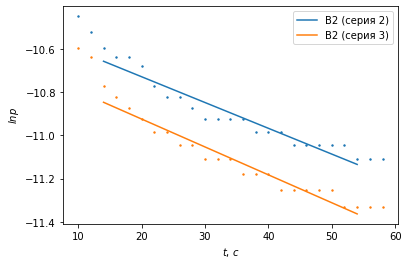

In [130]:
fr = 5
to = 30

def lin(x, y, lbl):
    t = np.linspace(x[2:-2].min(), x[2:-2].max())
    plt.scatter(x, y, s=SIZE)
    #print(np.polyfit(x[2:-2], y[2:-2], 1), mnkerr(x[2:-2], y[2:-2]))
    cf = np.polyfit(x[2:-2], y[2:-2], 1)
    er = mnkerr(x[2:-2], y[2:-2])
    print('${a:.4} \pm {ea:.4}$     &    ${b:.4} \pm {eb:.4}$'.format(a=cf[0], ea=er[0], b=cf[1], eb=er[1]))
    plt.plot(t, np.polyval(np.polyfit(x[2:-2], y[2:-2], 1), t), label=lbl)  

#lin(III41['time'][fr:to], np.log(III41['B2'][fr:to]), 'B2 (cерия 1)')
lin(III42['time'][fr:to], np.log(III42['B2'][fr:to]), 'B2 (cерия 2)')
lin(III43['time'][fr:to], np.log(III43['B2'][fr:to]), 'B2 (cерия 3)')

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$lnp$")
    
plt.legend()

plt.savefig('res/TMHlnB2(t).pdf')

In [196]:
vsf = 265
vk = vsf * 1e3 / 170 - vsf
v  = vsf * 1e3 / 120 - vsf
vmag = v - vk
vn = vmag
print("v сильфон = ${v} \pm {dv}$ мл".format(v = vsf, dv = 0.05*vsf))
print("v полный = ${v} \pm {dv}$ мл".format(v = v, dv = 0.05*v))
print("v камеры = ${v} \pm {dv}$ мл".format(v = vk, dv = 0.05*vk))
print("v форв магистраль = ${v} \pm {dv}$ мл".format(v = vmag, dv = 0.05*vmag))
print("v насоса = ${v} \pm {dv}$ мл".format(v = vk, dv = 0.05*vk))

v сильфон = $265 \pm 13.25$ мл
v полный = $1943.3333333333335 \pm 97.16666666666669$ мл
v камеры = $1293.8235294117646 \pm 64.69117647058823$ мл
v форв магистраль = $649.5098039215688 \pm 32.47549019607845$ мл
v насоса = $1293.8235294117646 \pm 64.69117647058823$ мл


In [164]:
1293 * 4.3e-05 *1e-6 * 3600 * ((1.377e-06 / 4.842e-05)**2 + 0.05**2)**0.5

1.1513356417554426e-05

In [133]:
-0.05354 * 1293

SyntaxError: invalid syntax (2619966829.py, line 1)

In [170]:
v * 1e-6 * 0.05653918 * 3600

0.39554810328

In [12]:
v * 1e-6 * 0.05353918 * 3600 * (0.1**2 + 0.00338 ** 2)**0.5

0.03747739984290402

In [151]:
(0.08**2 + 0.13**2)**0.5

0.15264337522473748

In [189]:
1293 * 1e-3 * 0.01253954 # 0.15

0.01621362522

In [180]:
9.9e-3 * 630

6.237

In [14]:
ZS1 = pd.read_csv('data/ZS1.txt', sep = '\t', converters=converters);
ZS1['time'] = (ZS1['time'] - ZS1['time'][0]).dt.total_seconds()
ZS2 = pd.read_csv('data/ZS2.txt', sep = '\t', converters=converters);
ZS2['time'] = (ZS2['time'] - ZS2['time'][0]).dt.total_seconds()


In [15]:
ZS1

,time,Freq,W,B2,B1
0,0.0,1500 Hz,15 W,0.000019,0.00015
1,2.0,1500 Hz,15 W,0.000019,0.00015
2,4.0,1500 Hz,15 W,0.000038,0.00025
3,6.0,1500 Hz,16 W,0.000060,0.00040
4,8.0,1500 Hz,16 W,0.000073,0.00045
5,10.0,1500 Hz,16 W,0.000084,0.00055
6,12.0,1500 Hz,15 W,0.000098,0.00065
7,14.0,1500 Hz,15 W,0.000120,0.00075
8,16.0,1500 Hz,15 W,0.000130,0.00085
9,18.0,1500 Hz,16 W,0.000150,0.00095


In [103]:
q1 = (np.array(ZS1['B1'][1:]) - np.array(ZS1['B1'][:-1])) / 2
q1

array([0.0e+00, 5.0e-05, 7.5e-05, 2.5e-05, 5.0e-05, 5.0e-05, 5.0e-05,
       5.0e-05, 5.0e-05, 7.5e-05, 0.0e+00, 5.0e-05, 5.0e-05, 1.0e-04,
       0.0e+00, 1.0e-04, 0.0e+00, 1.0e-04, 5.0e-05, 5.0e-05, 0.0e+00,
       5.0e-05, 5.0e-05, 0.0e+00, 5.0e-05, 0.0e+00, 5.0e-05, 5.0e-05,
       0.0e+00, 5.0e-05, 0.0e+00, 5.0e-05, 0.0e+00, 5.0e-05, 5.0e-05,
       0.0e+00])

$4.842e-05 \pm 1.377e-06$     &    $8.385e-05 \pm 0.001079$
$3.745e-05 \pm 9.298e-07$     &    $7.063e-05 \pm 0.0008542$


0.05172

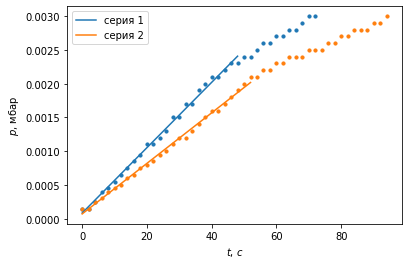

In [156]:

plt.scatter(ZS1['time'], ZS1['B1'], s = 10)
plt.scatter(ZS2['time'], ZS2['B1'], s = 10)

x = ZS1['time'][0:25]
y = ZS1['B1'][0:25]
t = np.linspace(x.min(), x.max())
cf = np.polyfit(x, y, 1)
er = mnkerr(x, y)
print('${a:.4} \pm {ea:.4}$     &    ${b:.4} \pm {eb:.4}$'.format(a=cf[0], ea=er[0], b=cf[1], eb=er[1]))
plt.plot(t, np.polyval(np.polyfit(x, y, 1), t), label="серия 1")  

x = ZS2['time'][0:27]
y = ZS2['B1'][0:27]
t = np.linspace(x.min(), x.max())
cf = np.polyfit(x, y, 1)
er = mnkerr(x, y)
print('${a:.4} \pm {ea:.4}$     &    ${b:.4} \pm {eb:.4}$'.format(a=cf[0], ea=er[0], b=cf[1], eb=er[1]))
plt.plot(t, np.polyval(np.polyfit(x, y, 1), t), label="серия 2") 

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$p$, мбар")
plt.legend()

plt.savefig('res/natek.pdf')
4e-5 * 1293

In [193]:
1293 * 4.3e-05 * 1e-3* ((1.377e-06 / 4.842e-05)**2 + 0.05**2)**0.5

3.198154560431785e-06

In [106]:
q1 = (ZS1['B1'] - ZS1['B1'][0]) / ZS1['time']
q2 = (ZS2['B1'] - ZS2['B1'][0]) / ZS2['time']
q1[0] = 0
q2[0] = 0

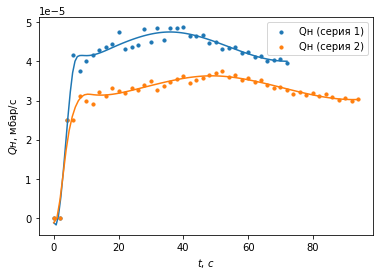

In [115]:
fro = 0
plt.scatter(ZS1['time'][fro:], q1[fro:], label = 'Qн (серия 1)', s = 10)
plt.scatter(ZS2['time'][fro:], q2[fro:], label = 'Qн (серия 2)', s = 10)

t = np.linspace(ZS1['time'].min(), ZS1['time'].max(), 100)
spl = UnivariateSpline(ZS1['time'][fro:], q1[fro:])
spl.set_smoothing_factor(1e-10)
plt.plot(t, spl(t))

t = np.linspace(ZS2['time'].min(), ZS2['time'].max(), 100)
spl = UnivariateSpline(ZS2['time'][fro:], q2[fro:])
spl.set_smoothing_factor(1e-10)
plt.plot(t, spl(t))

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$Qн$, мбар/c")
plt.legend()

plt.savefig('res/Q(t).pdf')